## Bidisagreements visualisation

In this notebook I will demonstrate how to use the `agreements` package within the annotations library, which allows for the qualitative assessment of bidisagreements (cases of data instances with 1 disagreement). The lone class here is `BiDisagreements`.

In [17]:
import sys
sys.path.append("..")

from annotations import agreements
import pandas as pd

First we will create a dummy dataset of labels. Remember that current capabilities allow for labels of ascending integers starting at zero, as no labels. So if you have the possible labels `["cat", "dog", "giraffe", None]`, you will want to convert these to `[0, 1, 2, None]`. 

The data set in this tutorial will have 15 instances of data, annotated by 3 annotators. The possible labels will be `[0, 1, 2, 3, None]`:

In [18]:
test_annotations = {"a": [None, None, None, None, None, 1, 3, 0, 1, 0, 0, 2, 2, None, 2],
                    "b": [0, None, 1, 0, 2, 2, 3, 2, None, None, None, None, None, None, None],
                    "c": [None, None, 1, 0, 2, 3, 3, None, 1, 0, 0, 2, 2, None, 3]}

In [19]:
df = pd.DataFrame(test_annotations)
labels = [0, 1, 2, 3] # Note that you don't need to specify the presence of None labels

Initialise the instance:

In [20]:
bidis = agreements.BiDisagreements(df, labels)

We can get a summary of the number of instances of data where no disagreements occurred, where 1 disagreement occurred (bidisagreement), where 2 disagreements occurred (tridisagreement), and where even more disagreements occurred:

In [21]:
bidis.agreements_summary()

Number of instances with:
No disagreement: 9
Bidisagreement: 2
Tridisagreement: 1
More disagreements: 0


(9, 2, 1, 0)

If you want to just have a look at the bidisagreements visually, there is a visualisation tool as well:

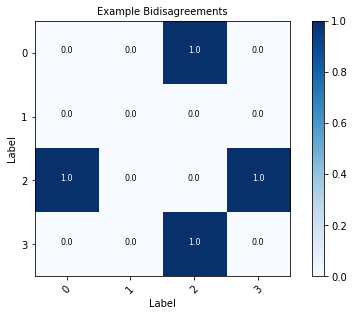

In [23]:
bidis.visualise(cmap="Blues", normalise=False, title="Example Bidisagreements")

As we've seen when using the `agreements_summary` method, there were two bidisagreements. This visualisation shows that one of these comes from a disagreement between labels 2 and 0, and the other comes from labels 2 and 3. 

At this small scale, it's not very useful, but when you have 10s of thousands of labels, this can be really useful for quickly identifying where large disagreements are coming from. Once you can pinpoint where the disagreement comes from, you can go about modifying annotation schema and/or label types.

Addressing these issues is essential to building datasets robust to machine learning algorithms. If your annotations are frought with disagreements, then any machine learning model will not be reliable.